In [1]:
#Cuaderno ejecutado en COLAB

In [2]:
!git clone https://github.com/mecyc/TFG_RADAR_60GHZ.git

Cloning into 'TFG_RADAR_60GHZ'...
remote: Enumerating objects: 1476, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 1476 (delta 11), reused 14 (delta 6), pack-reused 1454
Receiving objects: 100% (1476/1476), 324.60 MiB | 8.13 MiB/s, done.
Resolving deltas: 100% (366/366), done.
Checking out files: 100% (705/705), done.


In [ ]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 8.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.4 MB 47.1 MB/s 
     |████████████████████████████████| 260 kB 46.4 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import autosklearn.classification
import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 


In [ ]:
#Se define la la función que muestra la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks([-0.5,0,1,2,2.5], ["","carton","cristal","plastico"])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizar matriz de confusion")
    #else:
        #print('Matriz de confusion')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
train = np.load('TFG_RADAR_60GHZ/scripts/train.npy')
test = np.load('TFG_RADAR_60GHZ/scripts/test.npy')

In [ ]:
modelo = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30, per_run_time_limit=120,n_jobs=-1,) # n_jobs=-1 significa usar todos los procesadores.

Particion  1
Tasa de acierto: 0.9333333333333333


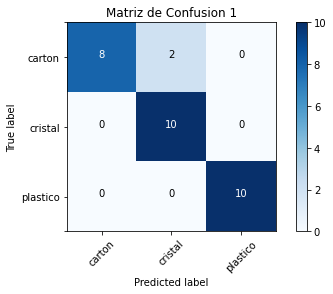

Particion  2
Tasa de acierto: 0.8


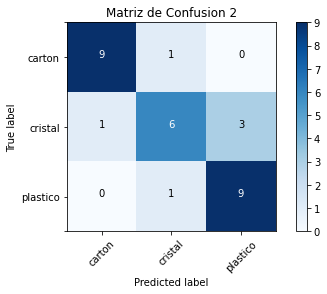

Particion  3
Tasa de acierto: 0.9


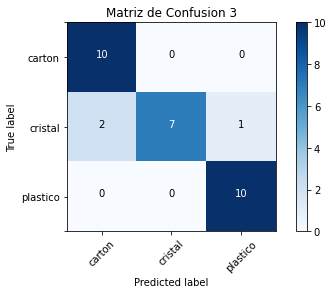

Particion  4
Tasa de acierto: 0.8666666666666667


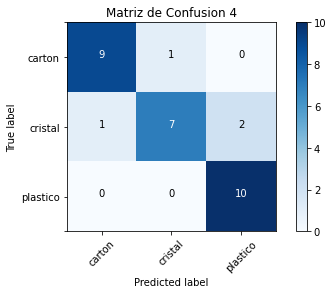

Particion  5
Tasa de acierto: 0.9


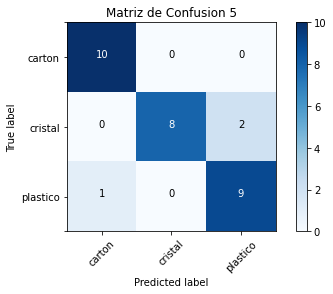

Particion  6
Tasa de acierto: 0.8666666666666667


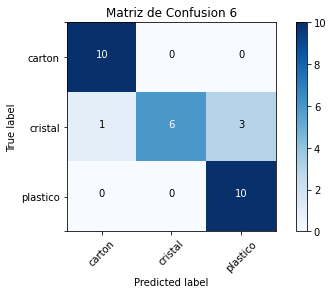

Particion  7
Tasa de acierto: 0.9


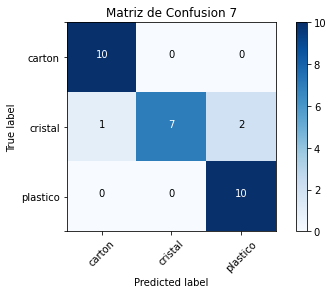

Particion  8
Tasa de acierto: 0.9333333333333333


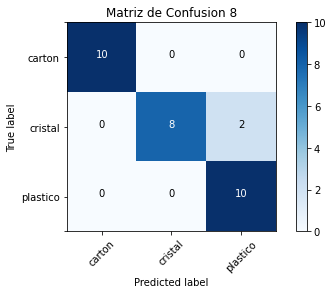

Particion  9
Tasa de acierto: 0.8333333333333334


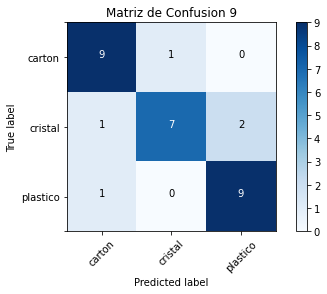

Particion  10
Tasa de acierto: 0.8333333333333334


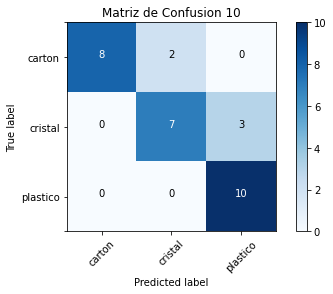

TODAS LAS PARTICIONES
Tasa de acierto promedio:  0.8767


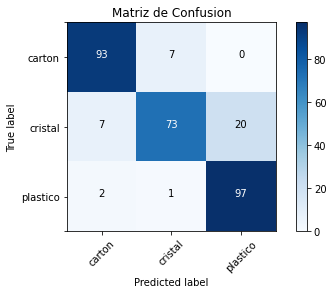

In [ ]:
x_train = list()
y_train = list()
x_test = list()
y_test = list()
y_prds = list()
y_prds2 = list()
y_test2 = list()
media = 0


#Entrenamos el modelo dejando fuera una vista por objeto en cada interacción con las particiones ya creadas
for i in range(len(train)):
    x_train = list()
    x_test = list()
    y_train = list()
    y_test = list()
    print("Particion ", i + 1)
    
    y_train = np.array(["carton"]*int(train[i].shape[0]/3) 
                    +  ["plastico"]*int(train[i].shape[0]/3) 
                    +  ["cristal"]*int(train[i].shape[0]/3))
    y_test = np.array(["carton"]*int(test[i].shape[0]/3) 
                   +  ["plastico"]*int(test[i].shape[0]/3) 
                   +  ["cristal"]*int(test[i].shape[0]/3))
    #print(len(y_train[0]))
    x_train = train[i]
    x_test = test[i]
    
    #for j in range(len(train[i])):
    #    x_train.append(train[i][j])
    modelo = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30, per_run_time_limit=120,n_jobs=-1,) # n_jobs=-1 significa usar todos los procesadores.
    modelo.fit(x_train,y_train)

    
    y_prds = modelo.predict(x_test)
    score = metrics.accuracy_score(y_test, y_prds)
    
    y_test2.extend(y_test)
    y_prds2.extend(y_prds)
    
    print('Tasa de acierto:',score)
    media += score
    
    #Confusion matrix
    #cm = confusion_matrix(y_test, y_prds)
    plt.figure() #num=None, figsize=(8, 6), dpi=80
    plot_confusion_matrix(confusion_matrix(y_test, y_prds), classes= ["carton","cristal","plastico"], 
                          title='Matriz de Confusion ' + str(i+1))
    plt.show()

print("TODAS LAS PARTICIONES")
print("Tasa de acierto promedio: {0: 0.4f}".format(media/len(test)))

#Confusion matrix (TODO)
#cm = confusion_matrix(y_test2, y_prds2)
plt.figure() #num=None, figsize=(8, 6), dpi=80
plot_confusion_matrix(confusion_matrix(y_test2, y_prds2), classes= ["carton","cristal","plastico"], 
                      title='Matriz de Confusion')
plt.show()

# -------------------------------------------------------------------------------